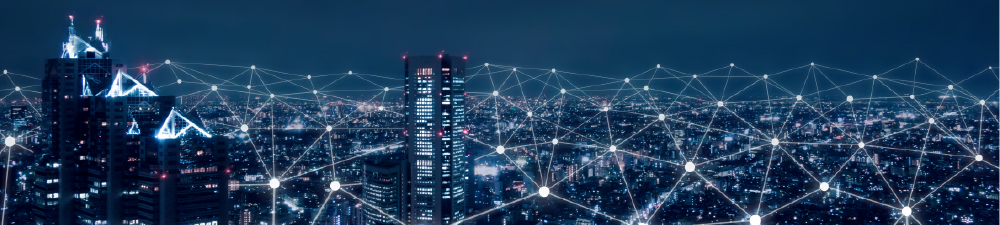

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("Mini project 3 Data.csv")
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df

cust_df.shape
cust_df.info()

(51047, 58)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [4]:
#How many customers had zero monthly revenue?

# Method 1
zerocount = cust_df.groupby('MonthlyRevenue').size()[0]
print(f'There are', zerocount, 'customers with zero monthy revenue.')

# Method 2 (True if MonthlyRevenue equals to 0)
(cust_df['MonthlyRevenue']== 0).value_counts()

There are 6 customers with zero monthy revenue.


False    51041
True         6
Name: MonthlyRevenue, dtype: int64

In [5]:
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

cust_df.drop(cust_df[cust_df['MonthlyRevenue'] == 0].index, inplace = True)

# Check to see if all zero monthly rows have been removed from cust_df
(cust_df['MonthlyRevenue']== 0).value_counts()

False    51041
Name: MonthlyRevenue, dtype: int64

### Q1.2 How many columns has missing values percentage > 5%

In [6]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

# Identify the columns that has null values
nullcount = cust_df.isnull().sum()
nullcount[nullcount > 0]

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        365
PercChangeRevenues       365
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
dtype: int64

In [7]:
result = cust_df.isnull().sum() * 100 / len(cust_df)
result[result > 0].sort_values(ascending=False)

AgeHH1                   1.780921
AgeHH2                   1.780921
PercChangeMinutes        0.715111
PercChangeRevenues       0.715111
MonthlyRevenue           0.305637
MonthlyMinutes           0.305637
TotalRecurringCharge     0.305637
DirectorAssistedCalls    0.305637
OverageMinutes           0.305637
RoamingCalls             0.305637
ServiceArea              0.047021
Handsets                 0.001959
HandsetModels            0.001959
CurrentEquipmentDays     0.001959
dtype: float64

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    
        How would you impute the missing values?
        I will use .dropna() to drop the missing values or fillna(0) to replace the null values with 0
    
        There is no columns that has missing values percentage more than 5%'
        The highest percentage for missing values is only 1.78% for 'AgeHH1 and AgeHH2' 
        For this dataframe, we can consider filling the values with 0.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

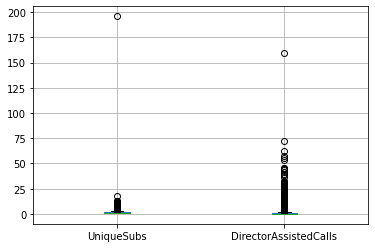

In [8]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

(50323, 58)

<AxesSubplot:>

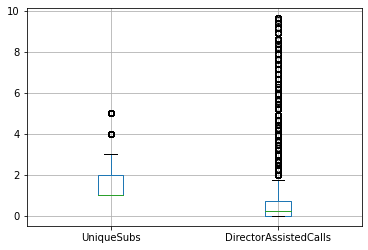

In [9]:
# #Remove top 1% outliers from the above mentioned two columns and plot the box plot again
# #Use "quantile" function to identify top 1% outliers

dropSubs = cust_df['UniqueSubs'].quantile(0.99)
dropCalls = cust_df['DirectorAssistedCalls'].quantile(0.99)

cust_df.drop(cust_df[cust_df['UniqueSubs'] > dropSubs].index, inplace = True)
cust_df.drop(cust_df[cust_df['DirectorAssistedCalls'] > dropCalls].index, inplace = True)

cust_df.shape
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

In [10]:
print(f'Max Overage Minutes:',cust_df['OverageMinutes'].max())
print(f'Max Monthly Revenue:',cust_df['MonthlyRevenue'].max())

Max Overage Minutes: 4321.0
Max Monthly Revenue: 1223.38


<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

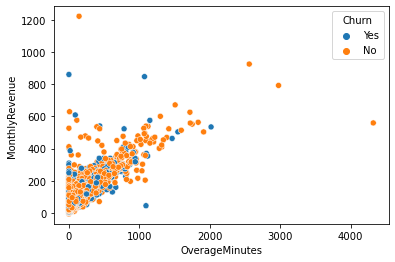

In [11]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = cust_df, hue='Churn' )

In [12]:
cust_df[['OverageMinutes','MonthlyRevenue' ]].corr().round(2)

,OverageMinutes,MonthlyRevenue
OverageMinutes,1.00,0.78
MonthlyRevenue,0.78,1.00


<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis
    
    The two variables have a correlation of r value 0.78. Therefore they have a strong correlation as r > 0.7.
    The longer the overage minutes, the higher the monthly revenue.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

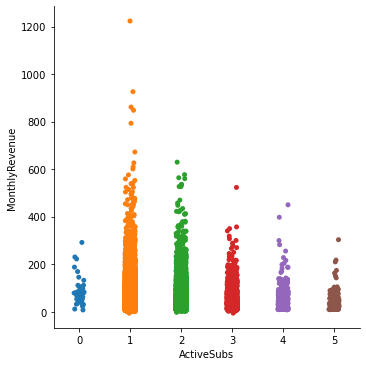

In [13]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs', y = 'MonthlyRevenue', data = cust_df ); 

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
    
    The more active subscription a user has, the lower the monthly revenue.
    The most revenue earned comes from 1 Active subs

### Q2.3 Does credit rating have an impact in churn rate?


ANALYSIS: There is no correlation with creditRating and Churn as the chart does not show the trend


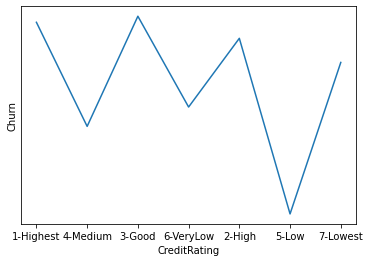

In [14]:
# METHOD 1
# A lineplot to show the Churn rate of each rating.

sns.lineplot(x= 'CreditRating', y= 'Churn', data= cust_df, ci= None)

print("\nANALYSIS: There is no correlation with creditRating and Churn as the chart does not show the trend");


ANALYSIS: The Churn Rate is the highest when the credit rating is at 2-High


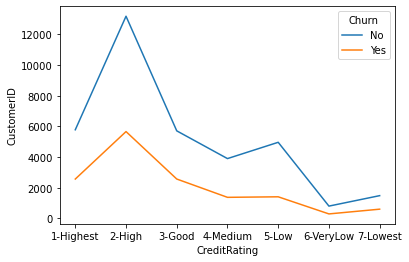

In [15]:
# METHOD 2
# A lineplot to show the Credit rating with the count of CustomerIDs that has a Churn of YES or NO.

groupID = cust_df.groupby(['CreditRating','Churn']).count()['CustomerID'].reset_index()
sns.lineplot(x = 'CreditRating', y = 'CustomerID', data = groupID , hue='Churn')

print("\nANALYSIS: The Churn Rate is the highest when the credit rating is at 2-High");

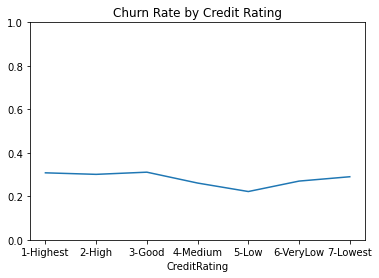

ANALYSIS: The chart shows an almost straight line, this means there is no correlation between Churn and CreditRating


In [16]:
# METHOD 3
# Selecting variables for x and y axis
df_plot = cust_df.groupby(['Churn', 'CreditRating']).size().reset_index().pivot(columns='Churn', index='CreditRating', values=0)

df_plot['Total'] = df_plot.sum(axis=1)
df_plot['Churnrate'] = (df_plot['Yes'] / df_plot['Total']).round(3)


# Plot the graph
df_plot['Churnrate'].plot()
plt.ylim([0, 1]) #set limit from 0 to 1
plt.title('Churn Rate by Credit Rating')
plt.show();

print("ANALYSIS: The chart shows an almost straight line, this means there is no correlation between Churn and CreditRating");

### Placeholder for additional exploratory analysis

##### type your code here for any additional exploratory analysis (if any)

In [17]:
# Method 4
# Convert Columns into numbers
# Created a temporary dataframe to store numeric converted Columns
temp_df = cust_df[['CreditRating','Churn']]

# replace r'\D' means it matches any non-decimal digit.
temp_df['CreditRating'] = cust_df['CreditRating'].str.replace(r'\D', '').astype(int)
temp_df['Churn'] = cust_df['Churn'].replace({'No': 0, 'Yes': 1}).astype(int)


# Correlation Test
temp_df[['CreditRating','Churn']].corr(method='pearson')

print("ANALYSIS: There is Little to NO correlation between 'Credit Rating' and 'Churn'")
print("ANALYSIS: A value of zero indicates that there is no relationship between the two variables. ")
print("ANALYSIS: The correlation metric shows a negative correlation of -0.04 which is close to 0")

,CreditRating,Churn
CreditRating,1.000000,-0.044456
Churn,-0.044456,1.000000


ANALYSIS: There is Little to NO correlation between 'Credit Rating' and 'Churn'
ANALYSIS: A value of zero indicates that there is no relationship between the two variables. 
ANALYSIS: The correlation metric shows a negative correlation of -0.04 which is close to 0


In [18]:
# Method 5
from scipy.stats import chi2_contingency

churncredit_rate = pd.crosstab(cust_df['Churn'], cust_df['CreditRating']).apply(lambda x: round(x/x.sum(),2), axis = 0)

#use axis = 0, calculate the proportion value by column, typical is axis =1, but crosstab use axis = 0 for columns
print(churncredit_rate)
print('\n\n')

churn_credit= pd.crosstab(cust_df['Churn'], cust_df['CreditRating'])#.apply(lambda x: round(x/x.sum(),2), axis = 0)
print(churn_credit)

chi2,pval,dof,expected = chi2_contingency(churn_credit)
print(pval)

CreditRating  1-Highest  2-High  3-Good  4-Medium  5-Low  6-VeryLow  7-Lowest
Churn                                                                        
No                 0.69     0.7    0.69      0.74   0.78       0.73      0.71
Yes                0.31     0.3    0.31      0.26   0.22       0.27      0.29



CreditRating  1-Highest  2-High  3-Good  4-Medium  5-Low  6-VeryLow  7-Lowest
Churn                                                                        
No                 5780   13175    5709      3902   4963        807      1488
Yes                2570    5662    2571      1378   1413        298       607
2.87328775510051e-42


<mark>__Result:__
    
Type your interpretation here based on the analysis above

    H0 : Both categorical variables have no relationship
    H1 : Both categorical variables have relationship
    
    Based on the P_value from chi2_contingency test by provided significant threshold of 0.05, 4.0790272665668016e-44 
    show that there is significant result. Therefore, we rejected H0.
    
    Churn seems to be highest at high credit rating but lower for users with low credit rating. Persons with good credit 
    rating have more flexibility in terms of service provider hopping as they are not likely to be tied down to 1 provider 
    due to outstanding bills/payments

## Q3. Create additional features to help predict churn

In [19]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']=cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minutes'] = cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']
    
    #type your code here to create any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [20]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)

# Test create_features, show the last 3 columns.
cust_df.iloc[:5 , -3:]

,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,0.5,0.916667,0.0
1,1.0,1.000589,0.0
2,1.0,1.000000,0.0
3,1.0,0.911522,0.0
4,1.0,0.991832,NaN


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

#### Method 1: Trying to split categorical variables and numeric variables for model training 

### Data sorting/cleaning

In [21]:
# Show non numeric columns for filtering

# cust_df.select_dtypes(exclude=['number']).head()

In [22]:
# Preparing my (X Independent variables) for train_test_split

# select only those columns that are of numeric data type and drop those unwanted.
x_variables= cust_df.select_dtypes(include=['number'])
x_variables= x_variables.drop(columns=['CustomerID'])

# Adding non numerical variable that may help with predicting customer Churn and converting them into dummies
non_numeric = cust_df[['HasCreditCard','CreditRating']]
non_numeric = pd.get_dummies(non_numeric)

# Merge non numerics and numeric columns
x_variables = x_variables.join(non_numeric)

# Fill Null values with 0
x_variables= x_variables.fillna(0)

# Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(x_variables)
x_variables = pd.DataFrame(sc, columns = x_variables.keys())

# Check my new X independent variables for errors by printing shaping and head
print(x_variables.shape)
# x_variables.info()

x_variables.head()

(50323, 46)


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,perc_overage_minutes,HasCreditCard_No,HasCreditCard_Yes,CreditRating_1-Highest,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest
0,-0.793545,-0.575583,-1.045574,-0.358250,-0.417643,-0.130473,-0.581900,-0.469500,-0.589266,-0.309742,...,-0.548197,-0.690215,0.690215,2.242032,-0.773476,-0.443781,-0.342376,-0.380899,-0.149837,-0.208421
1,-0.958888,-0.984785,-1.260693,-0.537414,-0.417643,-0.130473,0.027619,0.030823,-0.634679,-0.375588,...,-0.548197,-0.690215,0.690215,-0.446024,-0.773476,-0.443781,2.920766,-0.380899,-0.149837,-0.208421
2,-0.463331,-0.988701,-0.357193,-0.537414,-0.417643,-0.130473,0.035586,0.030823,-0.668739,-0.375588,...,-0.548197,-0.690215,0.690215,-0.446024,-0.773476,2.253366,-0.342376,-0.380899,-0.149837,-0.208421
3,0.581088,1.564409,1.234688,0.351239,-0.417643,-0.130473,0.669008,0.244119,5.234985,0.348718,...,-0.548197,-0.690215,0.690215,-0.446024,-0.773476,-0.443781,2.920766,-0.380899,-0.149837,-0.208421
4,-0.955350,-1.004364,-1.260693,-0.537414,-0.417643,-0.130473,0.043554,0.025557,-0.668739,-0.375588,...,-0.548197,-0.690215,0.690215,2.242032,-0.773476,-0.443781,-0.342376,-0.380899,-0.149837,-0.208421


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


### Model Training

In [23]:
# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

In [24]:
#-------------------------------- Model training -------------------------------#
#type your code to build logistic regression model on training data set

# 1. Prepare data for modeling
X= x_variables           # X = Independent variables
y= cust_df['Churn']      # Y = Dependent variable (churn flag)

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 3. Build logistic regression model on training data set
model = LogisticRegression()

# 4. Fit the model
fit = model.fit(X_train,y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

((35226, 46), (15097, 46), (35226,), (15097,))

In [25]:
#-------------------------------- Model testing ---------------------------------#
#type your code here to predict for X_test data set using the fitted model

# 6. Check accuracy score 
res_log= metrics.accuracy_score(y_test, y_pred)
print (f'Model Accuracy:', (res_log*100).round(2) ,'% predicted the right outcome with "Churn"')


# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
threshold = 0.37
y_test_pt = y_test.replace({'No': 0, 'Yes': 1}).astype(int)
y_pred_pt = (model.predict_proba(X_test)[:,1]>=threshold).astype(int)

show= metrics.accuracy_score(y_test_pt, y_pred_pt)
print (f'\nHOWEVER, If we use a probability threshold of', threshold,
       ',the model accuracy will show as:',(show*100).round(2),'%')

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
metric = confusion_matrix(y_test, y_pred)
metric_pt = confusion_matrix(y_test_pt, y_pred_pt)
classification = classification_report(y_test, y_pred)
classification_pt = classification_report(y_test_pt, y_pred_pt)

print('\nConfusion matrix Normal')
print(metric ,'\n\nConfusion matrix with Threshold\n' ,metric_pt)

print(f'\nClassification Report Normal:\n', classification, '\n\nClassification Report with Threshold:\n',classification_pt)

Model Accuracy: 71.29 % predicted the right outcome with "Churn"

HOWEVER, If we use a probability threshold of 0.37 ,the model accuracy will show as: 69.58 %

Confusion matrix Normal
[[10643   102]
 [ 4233   119]] 

Confusion matrix with Threshold
 [[9571 1174]
 [3418  934]]

Classification Report Normal:
               precision    recall  f1-score   support

          No       0.72      0.99      0.83     10745
         Yes       0.54      0.03      0.05      4352

    accuracy                           0.71     15097
   macro avg       0.63      0.51      0.44     15097
weighted avg       0.66      0.71      0.61     15097
 

Classification Report with Threshold:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81     10745
           1       0.44      0.21      0.29      4352

    accuracy                           0.70     15097
   macro avg       0.59      0.55      0.55     15097
weighted avg       0.65      0.70      0.66     150

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [26]:
#-------------------------------- Model training -------------------------------#
#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier

# 3. Build random forest classifier model on training data set
model = RandomForestClassifier(n_estimators=100)

# 4. Fit the model
fit = model.fit(X_train,y_train)

# 5. Make predictions
y_pred = model.predict(X_test)


In [27]:
#-------------------------------- Model testing ---------------------------------#
#type your code here to predict for X_test data set using the fitted RF model

# 6. Check accuracy score 
res_for= metrics.accuracy_score(y_test, y_pred)
print (f'Model Accuracy:', (res_for*100).round(2) ,'% predicted the right outcome with "Churn"')


# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
threshold = 0.37
y_test_pt = y_test.replace({'No': 0, 'Yes': 1}).astype(int)
y_pred_pt = (model.predict_proba(X_test)[:,1]>=threshold).astype(int)

show= metrics.accuracy_score(y_test_pt, y_pred_pt)
print (f'\nHOWEVER, If we use a probability threshold of', threshold,
       ',the model accuracy will show as:',(show*100).round(2),'%')

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
metric = confusion_matrix(y_test, y_pred)
metric_pt = confusion_matrix(y_test_pt, y_pred_pt)
classification = classification_report(y_test, y_pred)
classification_pt = classification_report(y_test_pt, y_pred_pt)

print('\nConfusion matrix Normal')
print(metric ,'\n\nConfusion matrix with Threshold\n' ,metric_pt)

print(f'\nClassification Report Normal:\n', classification, '\n\nClassification Report with Threshold:\n',classification_pt)

Model Accuracy: 71.98 % predicted the right outcome with "Churn"

HOWEVER, If we use a probability threshold of 0.37 ,the model accuracy will show as: 67.58 %

Confusion matrix Normal
[[10498   247]
 [ 3983   369]] 

Confusion matrix with Threshold
 [[8373 2372]
 [2522 1830]]

Classification Report Normal:
               precision    recall  f1-score   support

          No       0.72      0.98      0.83     10745
         Yes       0.60      0.08      0.15      4352

    accuracy                           0.72     15097
   macro avg       0.66      0.53      0.49     15097
weighted avg       0.69      0.72      0.64     15097
 

Classification Report with Threshold:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77     10745
           1       0.44      0.42      0.43      4352

    accuracy                           0.68     15097
   macro avg       0.60      0.60      0.60     15097
weighted avg       0.67      0.68      0.67     150

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    
    RANDOM FOREST MODEL has better accuracy. 
    
    Based on the Classification report, the 'YES' values,
    Random Forest model have higher Precison, Recall and F1-Score value compare to LogisticsRegression
    
    Therefore RANDOM FOREST MODEL is the better model.

### Q4.3 Identify most important features impacting churn

### Model Visualization

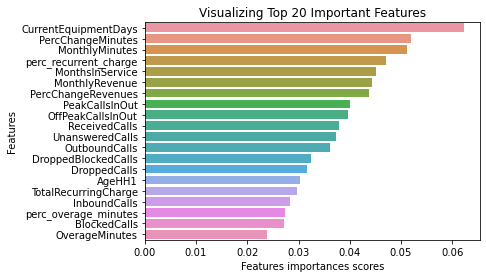

ANALYSIS: CurrentEquipmentDays is the most important feature impacting Churn


In [28]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

show_top20 = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(20)

# Creating a seaborn bar plot
sns.barplot(x=show_top20, y=show_top20.index)

# Add labels to the graph
plt.xlabel('Features importances scores')
plt.ylabel('Features')

# Add title to the graph
plt.title('Visualizing Top 20 Important Features')

# Visualize the graph
plt.show()

print(f'ANALYSIS:',  show_top20.keys()[0], 'is the most important feature impacting Churn');

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [29]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

holdout = pd.read_csv('Mini project 3 Hold Out Data.csv')

#Make a call to the feature engineering wrapper function for churn prediction
holdout=create_features(holdout)
# Test create_features, show the last 3 columns.

# holdout.info()
holdout.shape
# holdout.head()

(20000, 61)

In [30]:
# Using previous threshold data, we assume 0.37 is the best probability value for Churn = YES

row_len = holdout.shape[0]
print(f'Current threshold:', threshold)

holdout['Churn_Predict'] = np.random.choice(["Yes", "No"], row_len, p=[threshold, (1-threshold)])
holdout.head()

Current threshold: 0.37


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes,Churn_Predict
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000,Yes


### Data sorting/cleaning

In [31]:
# Filter non numeric and numerics
non_numeric = holdout.select_dtypes(exclude='number')
numeric = holdout.select_dtypes(include='number')
numeric = numeric.drop(columns=['CustomerID','Churn'])

drop99 = numeric.quantile(0.99)
print(f'UPPER QUARTILE at 99% :',drop99['MonthlyRevenue'])

for i in numeric.keys():
    numeric.drop(numeric[numeric[i] > drop99[i]].index,inplace=True)
    
new_holdout = numeric.join(non_numeric)
new_holdout.shape
new_holdout.head()

UPPER QUARTILE at 99% : 224.34660000000005


(16797, 60)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn_Predict
24,58.82,250.0,30.0,3.71,72.0,0.0,49.0,11.5,0.7,2.3,...,No,Yes,Yes,30,No,1-Highest,Suburban,Professional,Yes,Yes
25,157.76,1328.0,79.0,3.96,343.0,0.6,-128.0,-2.8,23.0,0.7,...,No,Yes,No,30,No,1-Highest,Other,Other,Unknown,Yes
28,79.18,725.0,75.0,4.21,0.0,0.0,15.0,-1.9,16.7,1.3,...,No,Yes,No,10,No,1-Highest,Other,Other,Unknown,No
32,61.50,796.0,50.0,0.00,110.0,0.0,-47.0,-2.9,2.3,3.7,...,No,Yes,No,30,No,1-Highest,Town,Other,Yes,Yes
41,33.52,26.0,30.0,0.00,0.0,0.0,5.0,-0.3,0.0,0.0,...,Yes,No,No,30,No,6-VeryLow,Suburban,Other,Unknown,No


### Model Training

In [32]:
# Preparing my (X Independent variables) for train_test_split

x_features = numeric

# Adding non numerical variable that may help with predicting customer Churn and converting them into dummies
non_numeric = new_holdout[['HasCreditCard','CreditRating']]
non_numeric = pd.get_dummies(non_numeric)
x_features = x_features.join(non_numeric)

# Fill Null values with 0
x_features = x_features.fillna(0)

# Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(x_features)
x_features = pd.DataFrame(sc, columns = x_features.keys())

# Check my new X independent variables for errors by printing shaping and head
print(x_features.shape)
x_features.head()

(16797, 46)


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,perc_overage_minutes,HasCreditCard_No,HasCreditCard_Yes,CreditRating_1-Highest,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest
0,0.254673,-0.480354,-0.729744,2.391964,0.820731,-0.320955,0.330625,0.560035,-0.683164,-0.115007,...,2.726299,-0.679805,0.679805,2.286994,-0.80512,-0.44015,-0.335237,-0.372531,-0.148203,-0.202874
1,3.756113,2.336570,1.752989,2.588673,5.845902,-0.034941,-0.610311,-0.032225,3.032982,-0.410533,...,2.383769,1.471011,-1.471011,2.286994,-0.80512,-0.44015,-0.335237,-0.372531,-0.148203,-0.202874
2,0.975204,0.760869,1.550317,2.785383,-0.514369,-0.320955,0.149880,0.005050,1.983129,-0.299711,...,-0.593322,1.471011,-1.471011,2.286994,-0.80512,-0.44015,-0.335237,-0.372531,-0.148203,-0.202874
3,0.349517,0.946400,0.283617,-0.527210,1.525368,-0.320955,-0.179713,-0.036366,-0.416535,0.143578,...,0.999531,-0.679805,0.679805,2.286994,-0.80512,-0.44015,-0.335237,-0.372531,-0.148203,-0.202874
4,-0.640682,-1.065689,-0.729744,-0.527210,-0.514369,-0.320955,0.096720,0.071317,-0.799815,-0.539825,...,-0.593322,1.471011,-1.471011,-0.437255,-0.80512,-0.44015,-0.335237,-0.372531,6.747524,-0.202874


In [33]:
#Use "predict" function on the transformend data using the best fitted model object (I USE RANDOM FOREST)

# 1. Prepare data for modeling
X= x_features
y= new_holdout['Churn_Predict']

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Build random forest classifier model on training data set
model = RandomForestClassifier(n_estimators=100)

# 4. Fit the model
fit = model.fit(X_train,y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

In [34]:
# 6. Check accuracy score 
res_forest= metrics.accuracy_score(y_test, y_pred)
print (f'Model Accuracy:', (res_forest*100).round(2) ,'% predicted the right outcome with "Churn"')

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
metric = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)


print('\nConfusion matrix Normal')
print(metric)

print(f'\nClassification Report Normal:\n', classification)

Model Accuracy: 62.72 % predicted the right outcome with "Churn"

Confusion matrix Normal
[[3081  138]
 [1741   80]]

Classification Report Normal:
               precision    recall  f1-score   support

          No       0.64      0.96      0.77      3219
         Yes       0.37      0.04      0.08      1821

    accuracy                           0.63      5040
   macro avg       0.50      0.50      0.42      5040
weighted avg       0.54      0.63      0.52      5040



### Model Visualization

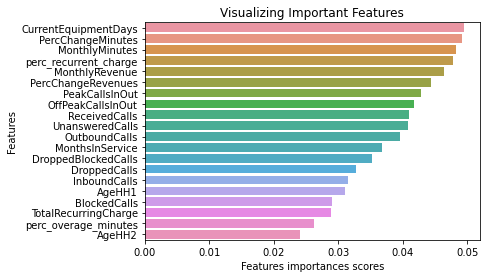

ANALYSIS: Using "create_features(cust_df)", we can conclude from the top 20 that...
ANALYSIS: CurrentEquipmentDays is the most important feature impacting Churn using the Random Forest Model


In [35]:
## Show important predictor features impacting churn using the Random Forest model
show2 = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(20)

# Creating a seaborn bar plot
sns.barplot(x=show2, y=show2.index)

# Add labels to the graph
plt.xlabel('Features importances scores')
plt.ylabel('Features')

# Add title to the graph
plt.title('Visualizing Important Features')

# Visualize the graph
plt.show()


print('ANALYSIS: Using "create_features(cust_df)", we can conclude from the top 20 that...')
print(f'ANALYSIS:', show2.keys()[0], 'is the most important feature impacting Churn using the Random Forest Model');

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [36]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   